In [1]:
#Load the data
import pandas as pd

airlines = pd.read_csv('airlines_flights_data.csv')
print(airlines.head())

   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


The data is about the "Airline Flights Data" of the country India. It contains the following columns:
    airline - name of the Airline;
    flight - flight code;
    source_city - from where the flights starts;
    departure_time - departure time of the flight from thew source city;
    stops - number of stops from start to end of a flight;
    arrival-time - arrival time of the flight at the destination city;
    destination_city - where the flight ends;
    duration - duration of the flights in hours;
    days_left - number of days left before departure date of a flight (when they bought the ticket); and
    price - ticket price of the flight.
The dataset can be found in kaggle or thorugh this link, https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data.

In [24]:
#Clean and Prepare the data for Exploratory Data Analysis

In [2]:
#Check the data types per column
print(airlines.dtypes)

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [3]:
#Check for missing values
print(airlines.isnull().sum())

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [4]:
#Check for duplicates
print(airlines.duplicated().sum())

0


In [5]:
#Drop Unnecessary Columns
airlines = airlines.drop('index', axis=1)
print(airlines.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [6]:
#Check for inconsistencies per qualitative column
print(airlines['airline'].value_counts())
print(airlines['flight'].value_counts())
print(airlines['source_city'].value_counts())
print(airlines['departure_time'].value_counts())
print(airlines['stops'].value_counts())
print(airlines['arrival_time'].value_counts())
print(airlines['destination_city'].value_counts())
print(airlines['class'].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-3211       1
6E-6474       1
6E-2914       1
SG-1058       1
6E-2939       1
Name: count, Length: 1561, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64
destination_city


In [7]:
#Remove '_' in airline, departure_time, and arrival_time columns
airlines['airline'] = airlines['airline'].str.replace("_"," ",regex=False)
print(airlines['airline'].value_counts())

airlines['departure_time'] = airlines['departure_time'].str.replace("_"," ",regex=False)
print(airlines['departure_time'].value_counts())

airlines['arrival_time'] = airlines['arrival_time'].str.replace("_"," ",regex=False)
print(airlines['arrival_time'].value_counts())

airline
Vistara      127859
Air India     80892
Indigo        43120
GO FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
departure_time
Morning          71146
Early Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late Night        1306
Name: count, dtype: int64
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early Morning    15417
Late Night       14001
Name: count, dtype: int64


In [8]:
#Replace the values in stops column to 0, 1, 2+
airlines['stops'] = airlines['stops'].replace({
    'zero': '0',
    'one':'1',
    'two_or_more':'1+'})
print(airlines['stops'].value_counts())

stops
1     250863
0      36004
1+     13286
Name: count, dtype: int64


In [26]:
#Performing Exploratory Data Analysis to further understand the data structure, patterns, and anomalies.

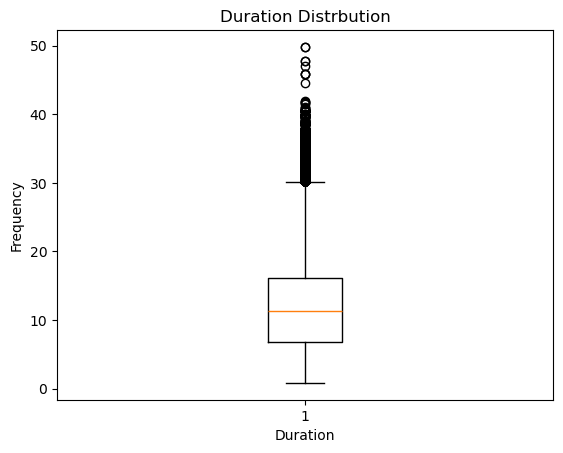

In [9]:
#Utilizing boxplot for visualization of outliers in duration column
import matplotlib.pyplot as plt

plt.boxplot(airlines['duration'],vert=True)
plt.title('Duration Distrbution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

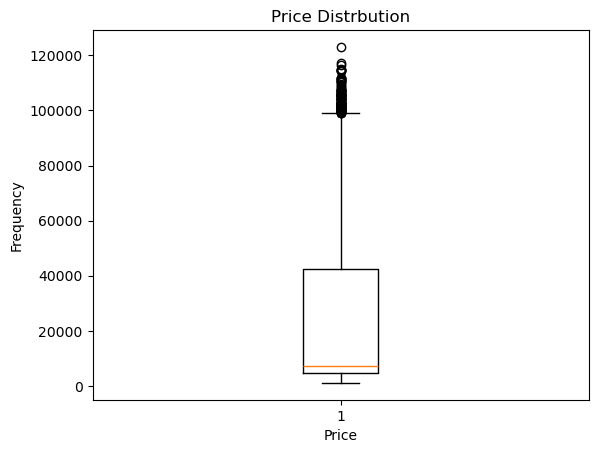

In [10]:
#Utilizing boxplot for visualization of outliers in price column
import matplotlib.pyplot as plt

plt.boxplot(airlines['price'],vert=True)
plt.title('Price Distrbution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

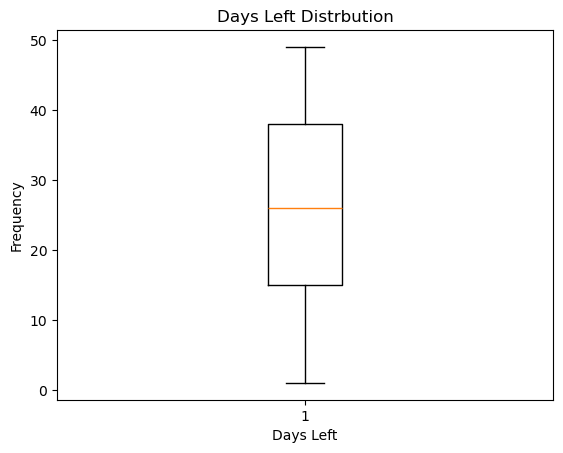

In [11]:
#Utilizing boxplot for visualization of outliers in price column
import matplotlib.pyplot as plt

plt.boxplot(airlines['days_left'],vert=True)
plt.title('Days Left Distrbution')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.show()

In [12]:
#Based on the box plots, there are outliers in duration and price column.

In [13]:
#Confirming the outliers based on the summary statistics
print(airlines.describe())

            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


In [14]:
#Comparing mean and median of the duration and price columns, it indicates that the mean of the price column is heavily pulled away from the median, while the mean of duration is not.

In [18]:
#Therefore, we need to remove the outliers from the price column only.
upper_Q = airlines['price'].quantile(0.75)
lower_Q = airlines['price'].quantile(0.25)
IQR = upper_Q - lower_Q
upper_outliers = upper_Q + (1.5 * IQR)
lower_outliers = lower_Q - (1.5 * IQR)
airlines = airlines[(airlines['price']>=lower_outliers) & (airlines['price']<=upper_outliers)]
print(airlines.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening     0          Night   
1  SpiceJet  SG-8157       Delhi  Early Morning     0        Morning   
2   AirAsia   I5-764       Delhi  Early Morning     0  Early Morning   
3   Vistara   UK-995       Delhi        Morning     0      Afternoon   
4   Vistara   UK-963       Delhi        Morning     0        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [19]:
#Confirming the removal of outliers in price column
print(airlines.describe())

            duration      days_left          price
count  300030.000000  300030.000000  300030.000000
mean       12.220126      26.012009   20855.326674
std         7.192515      13.557878   22638.775853
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000   98972.000000


In [23]:
#Now, the data is ready for visualizations.
print(airlines.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening     0          Night   
1  SpiceJet  SG-8157       Delhi  Early Morning     0        Morning   
2   AirAsia   I5-764       Delhi  Early Morning     0  Early Morning   
3   Vistara   UK-995       Delhi        Morning     0      Afternoon   
4   Vistara   UK-963       Delhi        Morning     0        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  
